Accuracy scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean accuracy: 0.9533333333333335
Standard deviation: 0.02666666666666666
Decision tree saved as 'decision_tree.png'


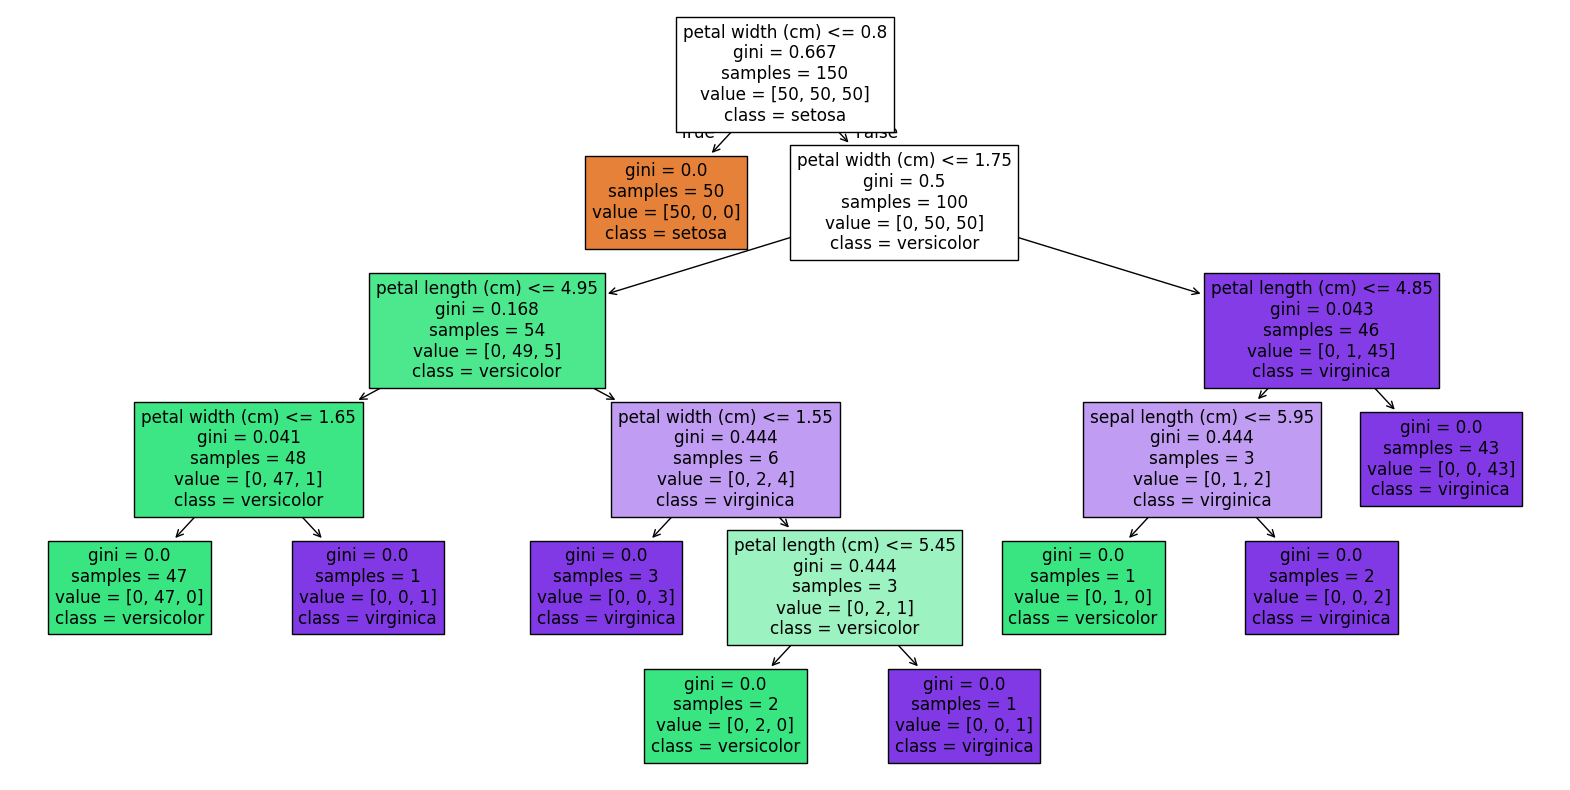

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
# Create decision tree classifier
dt = DecisionTreeClassifier(criterion='gini')
# K-fold setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross validation
scores = cross_val_score(dt, X, y, cv=kfold, scoring="accuracy")
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())
# Fit the model on the full dataset
dt.fit(X, y)
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.savefig('decision_tree.png')
print("Decision tree saved as 'decision_tree.png'")

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
# Load dataset
data = load_diabetes()
X = data.data
y = data.target
# Train model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X, y)
# Cross validation MSE
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mse = -scores.mean()
print("Mean MSE:", mse)

Mean MSE: 4594.846048148582


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
'max_depth': [2, 3, 4, 5, 6, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'criterion': ['gini', 'entropy']
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
estimator=dt,
param_grid=param_grid,
cv=kfold,
scoring='accuracy',
n_jobs=-1
)
grid_search.fit(X, y)
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
# Train final model using best parameters
best_model = grid_search.best_estimator_

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9666666666666668


In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Load dataset
train_df = pd.read_csv('train.csv')
# Separate target and features
y = train_df['SalePrice']
X = train_df.drop(columns=['SalePrice', 'Id'])
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns
# Preprocessing
preprocessor = ColumnTransformer([
('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
('num', 'passthrough', num_cols)
])
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
# Hyperparameter grid
param_grid = {
'model__max_depth': [3, 5, 7, 10, None],
'model__min_samples_split': [2, 5, 10, 20],
'model__min_samples_leaf': [1, 2, 5, 10]
}
# Pipeline
pipeline = Pipeline([
('preprocess', preprocessor),
('model', dt_reg)
])
# Cross validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Grid Search
grid_search = GridSearchCV(
estimator=pipeline,
param_grid=param_grid,
scoring='neg_root_mean_squared_error',
cv=kfold,
n_jobs=-1
)
# Fit grid search
grid_search.fit(X, y)
print("Best hyperparameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)
# Train final best model
best_pipeline = grid_search.best_estimator_
# Extract trained decision tree from pipeline
best_tree = best_pipeline.named_steps['model']
# Transform X using preprocessing
X_transformed = best_pipeline.named_steps['preprocess'].transform(X)

Best hyperparameters: {'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
Best CV RMSE: 34063.95173874488


In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

depths = [1,2,3,4,5,6,None]

print("Depth -- Mean CV Accuracy")
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    print(f"{d} -- {scores.mean():.4f}")

Depth -- Mean CV Accuracy
1 -- 0.6333
2 -- 0.9467
3 -- 0.9533
4 -- 0.9533
5 -- 0.9533
6 -- 0.9533
None -- 0.9533


In [8]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv
Saving titanic.csv to titanic.csv
Saving house_data.csv to house_data.csv


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

data = pd.read_csv("house_data.csv")
X = data.drop("Price", axis=1)
y = data["Price"]

depths = [2,3,4,5,6,8]

print("Depth -- MSE")
for d in depths:
    model = DecisionTreeRegressor(max_depth=d)
    scores = cross_val_score(
        model, X, y,
        cv=5,
        scoring="neg_mean_squared_error"
    )
    mse = -scores.mean()
    print(d, "--", mse)

Depth -- MSE
2 -- 1531817045.763719
3 -- 918817951.3594732
4 -- 864609758.9494696
5 -- 847787166.1788366
6 -- 843341845.7451363
8 -- 948084161.9160407


In [10]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv("titanic.csv")

X = data.drop("Survived", axis=1)
y = data["Survived"]

cat_cols = ["Sex"]
num_cols = ["Pclass","Age","Fare"]

pre = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_cols),
    ("num", "passthrough", num_cols)
])

pipe = Pipeline([
    ("prep", pre),
    ("model", DecisionTreeClassifier())
])

param = {
    "model__max_depth":[2,3,5,None],
    "model__min_samples_split":[2,5,10]
}

grid = GridSearchCV(pipe, param, cv=5)
grid.fit(X,y)

print(grid.best_params_)
print(grid.best_score_)

{'model__max_depth': 2, 'model__min_samples_split': 2}
1.0


In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv("adult.csv")
X = data.drop("income", axis=1)
y = data["income"]

cat = ["education"]
num = ["age","hours"]

pre = ColumnTransformer([
    ("cat",OneHotEncoder(),cat),
    ("num","passthrough",num)
])

pipe = Pipeline([
    ("prep",pre),
    ("model",DecisionTreeClassifier())
])

param={
    "model__max_depth":[3,5,None],
    "model__min_samples_leaf":[1,2,5]
}

grid=GridSearchCV(pipe,param,cv=5)
grid.fit(X,y)

print(grid.best_params_)
print(grid.best_score_)

{'model__max_depth': 3, 'model__min_samples_leaf': 1}
1.0
